In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np

df = pd.read_csv('datasets/owid-covid-data.csv')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.loc[world['name'] == 'France', 'iso_a3'] = 'FRA'
world.loc[world['name'] == 'Norway', 'iso_a3'] = 'NOR'
world.loc[world['name'] == 'N. Cyprus', 'iso_a3'] = 'CYP'
world.loc[world['name'] == 'Somaliland', 'iso_a3'] = 'SOM'
world.loc[world['name'] == 'Kosovo', 'iso_a3'] = 'RKS'

df = df.drop(df[df.date != '2022-01-23'].index)
df = df.dropna(axis=0, subset='continent')
df = df.drop(columns=['continent', 'location'])

df.reset_index(drop=True, inplace=True)

In [2]:
world.columns=['pop_est', 'continent', 'name', 'iso_code', 'gdp_md_est', 'geometry']

df_merged = pd.merge(world, df, on='iso_code')

df_merged.head(10)

,pop_est,continent,name,iso_code,gdp_md_est,geometry,date,total_cases,new_cases,new_cases_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",2022-01-23,60931.0,NaN,NaN,...,10.2,34.8,NaN,2.30,67.44,0.743,NaN,NaN,NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2022-01-23,32393.0,NaN,NaN,...,3.3,26.7,47.953,0.70,65.46,0.529,NaN,NaN,NaN,NaN
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2022-01-23,2885629.0,NaN,NaN,...,12.0,16.6,NaN,2.50,82.43,0.929,NaN,NaN,NaN,NaN
3,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",2022-01-23,70700678.0,204804.0,681446.000,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
4,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",2022-01-23,1243220.0,11364.0,13865.000,...,7.0,43.1,98.999,6.70,73.60,0.825,NaN,NaN,NaN,NaN
5,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",2022-01-23,213767.0,1478.0,1240.286,...,1.3,24.7,NaN,4.00,71.72,0.720,NaN,NaN,NaN,NaN
6,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",2022-01-23,36446.0,0.0,1.571,...,23.5,48.8,NaN,NaN,64.50,0.555,NaN,NaN,NaN,NaN
7,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",2022-01-23,4286378.0,2925.0,2104.143,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
8,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",2022-01-23,7862536.0,69884.0,109667.286,...,16.2,27.7,NaN,5.00,76.67,0.845,NaN,NaN,NaN,NaN
9,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...",2022-01-23,1965393.0,15718.0,12683.286,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN


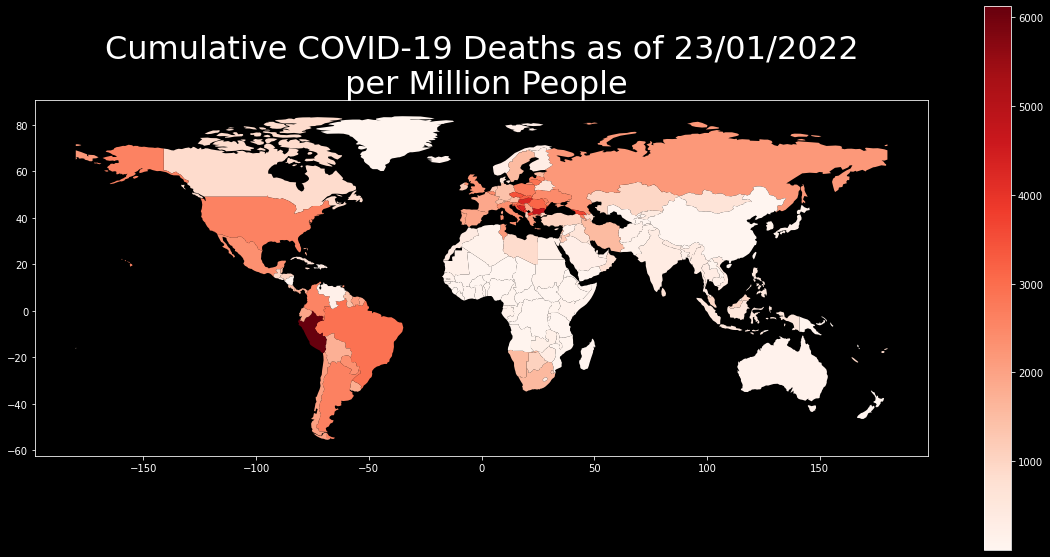

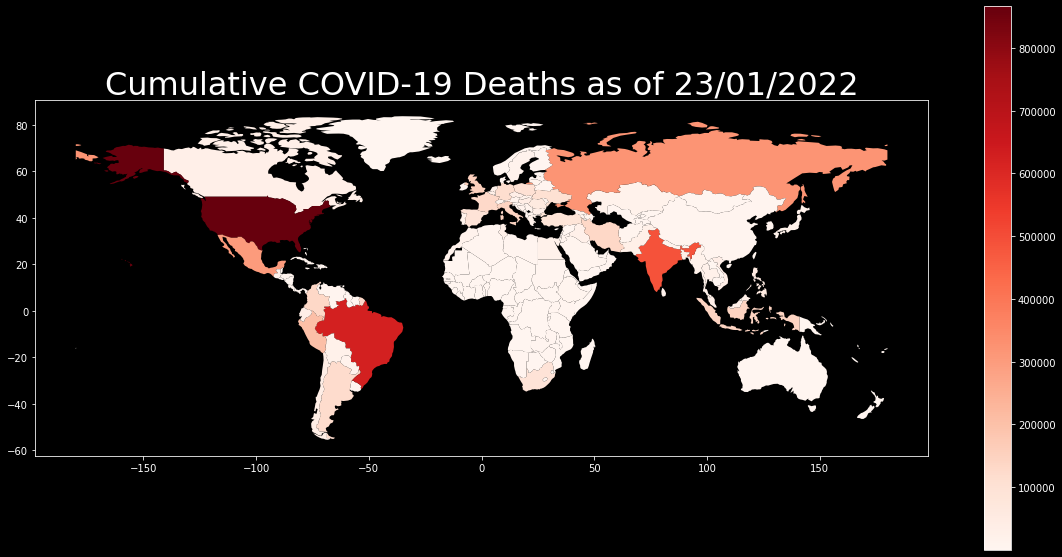

In [3]:
plt.style.use('dark_background')

df_merged.plot(column='total_deaths_per_million', figsize=(20, 10), legend=True, cmap='Reds', linewidth=12)

plt.title('Cumulative COVID-19 Deaths as of 23/01/2022\n per Million People', fontsize=32)
plt.savefig('output/covid_deaths_per_capita.jpg', dpi=600)

df_merged.plot(column='total_deaths', figsize=(20, 10), legend=True, cmap='Reds', linewidth=12)

plt.title('Cumulative COVID-19 Deaths as of 23/01/2022', fontsize=32)
plt.savefig('output/covid_deaths_total.jpg', dpi=600)